Importing Required Libraries

In [11]:
from qiskit.circuit import QuantumCircuit
from qiskit import QuantumCircuit,assemble
from qiskit.compiler import assemble,transpile
from qiskit_aer import Aer
from math import pi, sqrt
import cmath
from qiskit.visualization import plot_bloch_multivector, plot_histogram
sim = Aer.get_backend('aer_simulator')
from qiskit import QuantumRegister, ClassicalRegister
import numpy as np


import warnings
warnings.filterwarnings("ignore")

Defining the Adder Circuit

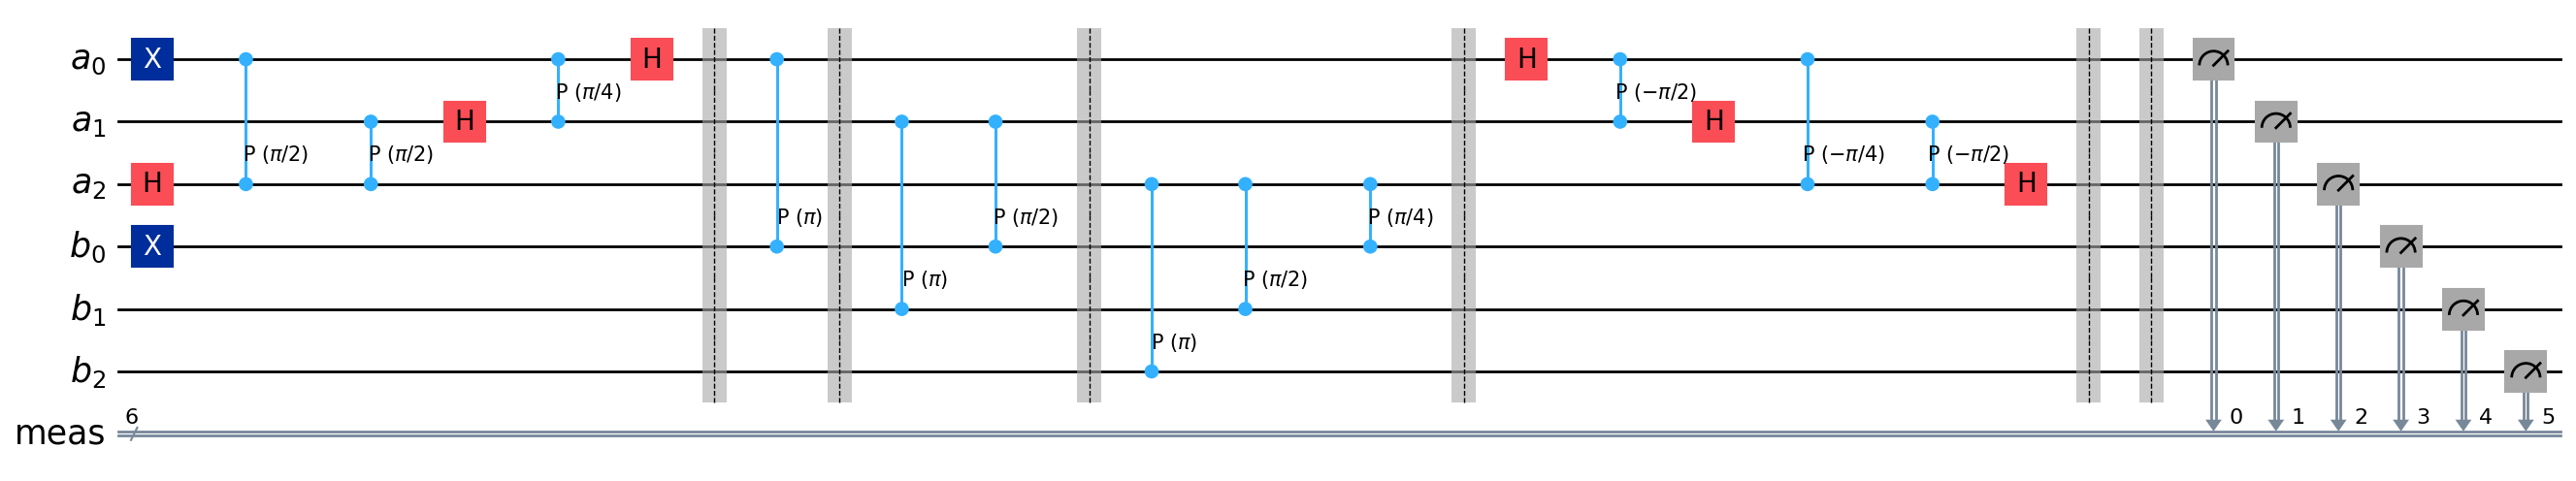

In [9]:
def qft_rotations_iterative(circuit, n,reg):
    for i in range(n):
        circuit.h(reg[n - i - 1])
        for j in range(n - i - 1):
            circuit.cp(np.pi / 2**(i + 1), reg[j], reg[n - i - 1])
    circuit.barrier()
    return circuit

def rotation_add(circuit, reg_a, reg_b,  n):

    for i in range(n+1):
        circuit.cp(np.pi / 2**i, reg_b[n - i], reg_a[n ])
    circuit.barrier()
    return circuit

def inverse_qft_rotations_iterative(circuit, n,reg):


    for i in range(n):
        for j in range(i):
            circuit.cp(-np.pi / 2**(i - j), reg[j], reg[i])
        circuit.h(reg[i])
    circuit.barrier()
    return circuit

def QFT(circuit, n,reg):
    qft_rotations_iterative(circuit,  n,reg)
    return circuit

def IQFT(circuit,n,reg):
    inverse_qft_rotations_iterative(circuit,n,reg)
    return circuit

#leftmost is LSB
n = 3


b = QuantumRegister(n,"b")
a = QuantumRegister(n,"a")
qc = QuantumCircuit(a,b)
#output is displayed in quantum register a
qc.x(b[0])
qc.x(a[0])
#for input 1+1, we should obtain an output 10 or 2
#qc.barrier()
qc = QFT(qc,n,a)
for i in range(n):
    qc = rotation_add(qc,a,b,i)
qc = IQFT(qc,n,a)
qc.measure_all()
qc.draw('mpl',fold=-1,style={"fontsize" : 20,"subfontsize":15})

Measuring and Validating the Adder Design

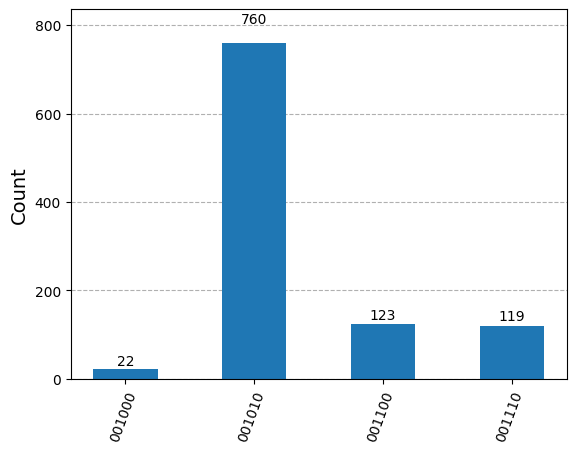

In [10]:
sim = Aer.get_backend('aer_simulator')
result = sim.run(qc).result()
counts = result.get_counts(qc)
plot_histogram(counts)